In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("Bridgerton_Visualizaciones_Semana_Temporada.csv")

# Mostrar las primeras filas
df.head()

,Semana,Temporada,Visualizaciones
0,1,T1,10.99
1,2,T1,9.70
2,3,T1,11.30
3,4,T1,13.20
4,5,T1,9.50


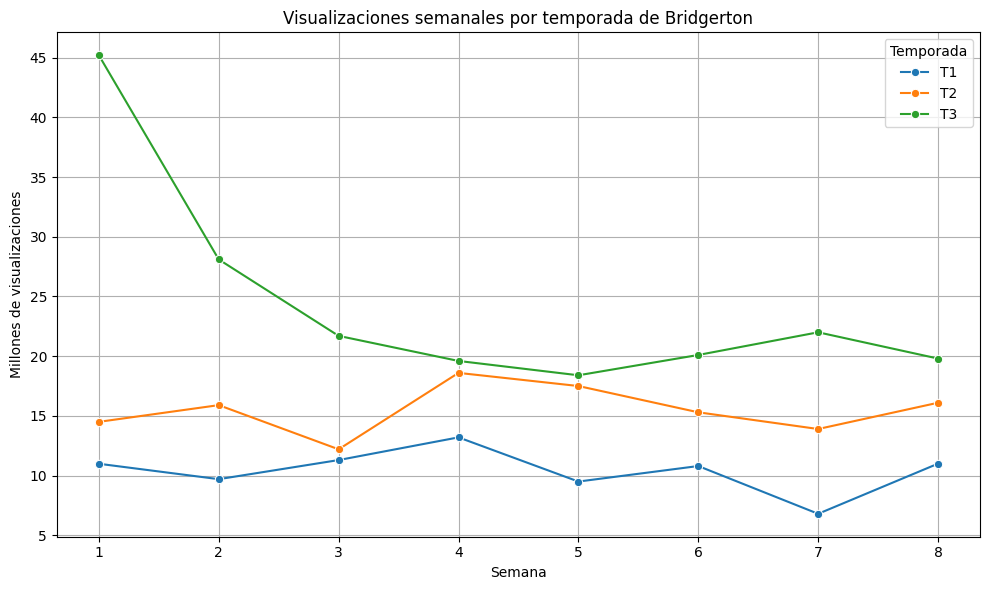

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Semana', y='Visualizaciones', hue='Temporada', marker='o')
plt.title('Visualizaciones semanales por temporada de Bridgerton')
plt.xlabel('Semana')
plt.ylabel('Millones de visualizaciones')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
from scipy import stats

# Crear columna Zscore por temporada
df['Zscore'] = df.groupby('Temporada')['Visualizaciones'].transform(lambda x: stats.zscore(x))

# Filtrar posibles anomalías (valores altos)
df[df['Zscore'] > 2]


ModuleNotFoundError: No module named 'scipy'

In [9]:
!pip install scipy

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ----- ---------------------------------- 5.8/41.0 MB 29.3 MB/s eta 0:00:02
   ----------- ---------------------------- 11.5/41.0 MB 27.8 MB/s eta 0:00:02
   ----------------- ---------------------- 17.8/41.0 MB 28.8 MB/s eta 0:00:01
   ---------------------- ----------------- 23.1/41.0 MB 28.6 MB/s eta 0:00:01
   ------------------------ --------------- 25.4/41.0 MB 24.4 MB/s eta 0:00:01
   ----------------------------- ---------- 29.9/41.0 MB 23.7 MB/s eta 0:00:01
   ----------------------------------- ---- 36.2/41.0 MB 24.7 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 23.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from scipy import stats

# Crear columna Zscore por temporada
df['Zscore'] = df.groupby('Temporada')['Visualizaciones'].transform(lambda x: stats.zscore(x))

# Filtrar posibles anomalías (valores altos)
df[df['Zscore'] > 2]


,Semana,Temporada,Visualizaciones,Zscore
16,1,T3,45.2,2.494886


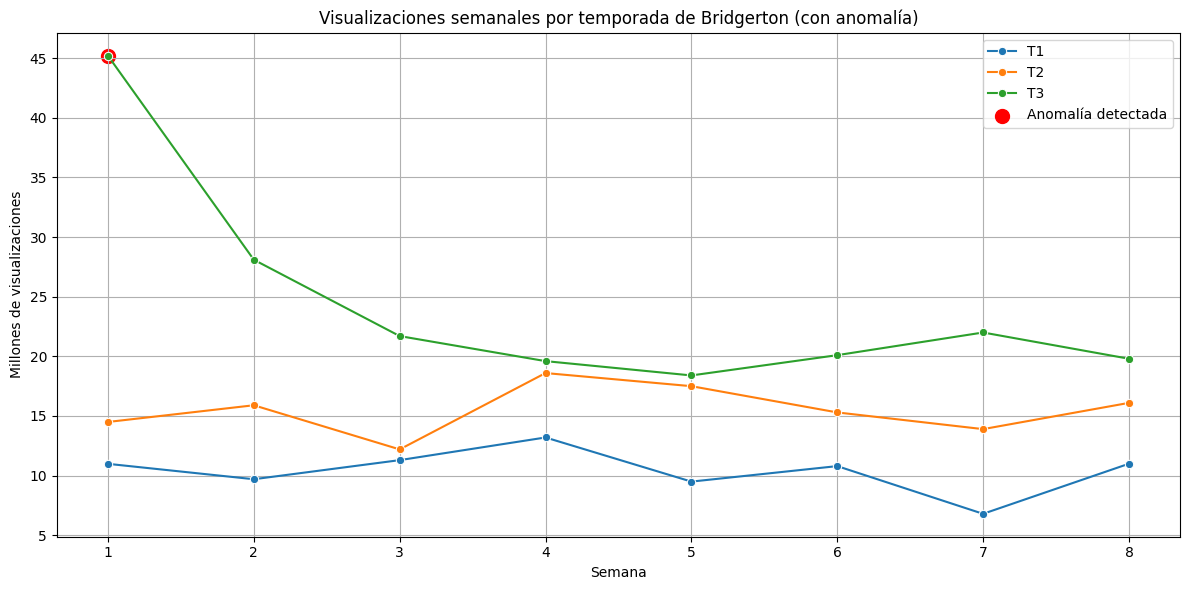

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Semana', y='Visualizaciones', hue='Temporada', marker='o')

# Agregamos los puntos anómalos (Zscore > 2)
anomalías = df[df['Zscore'] > 2]
plt.scatter(anomalías['Semana'], anomalías['Visualizaciones'], color='red', s=100, label='Anomalía detectada')

plt.title("Visualizaciones semanales por temporada de Bridgerton (con anomalía)")
plt.xlabel("Semana")
plt.ylabel("Millones de visualizaciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()